<a href="https://colab.research.google.com/github/shksuraj/Capstone-project-ML-classification/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. 

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


# Data Description:

## Demographic:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


## Behavioral:

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


# Medical( history):

• **BP Meds**: whether or not the patient was on blood pressure medication(Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)
Predict variable (desired target)

## 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -dependent variable

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Importing important libraries

In [ ]:
# importing pandas for data reading and manipulations
# numpy for linear algebra
# seaborn and matplotlib for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Cardiovascular Risk Prediction capstone_3/data_cardiovascular_risk.csv')

In [ ]:
# first ten rows
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
# last ten rows
df.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# data types and null values in features ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* In this dataset we have 3390 rows, 17 columns.


In [ ]:
# summary of numerical features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# duplicates any ?
len(df[df.duplicated()])

0

* **Observation**: NO duplicate rows in our data.

In [ ]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# dropping the feature named 'id' which is not necessary for our study
df.drop('id',axis=1,inplace=True)

# Missing values in different features:

In [ ]:
# missing values in each feature
df.isnull().sum().sort_values(ascending=False)


glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

* NUll values are present in features named 'glucose', 'education', 'BPMeds',   'totChol', 'cigsPerDay', 'BMI', 'heartRate'.

# Exploratory Data Analysis:


---

## Univariate Analysis:

In [ ]:
# numeric features in our data set
# Lets check the discrete and continuous features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


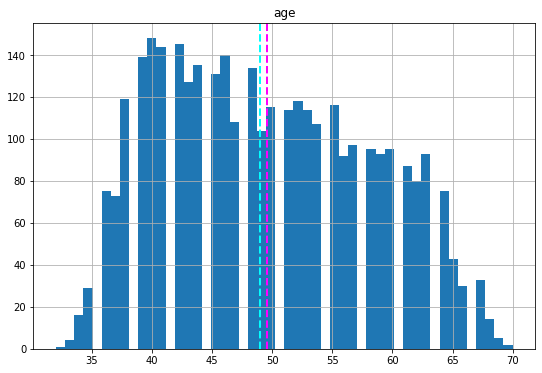

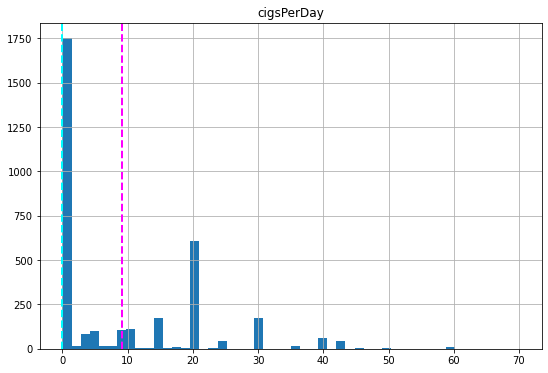

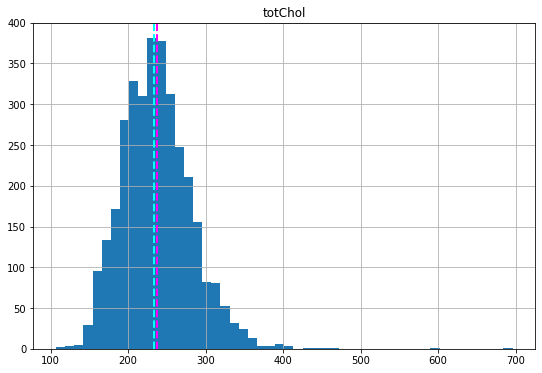

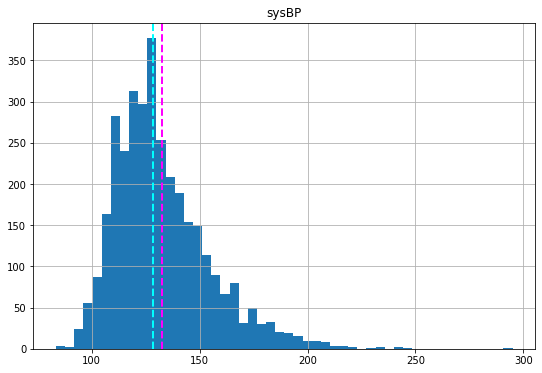

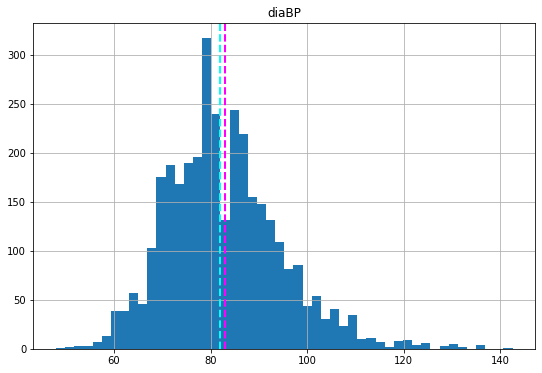

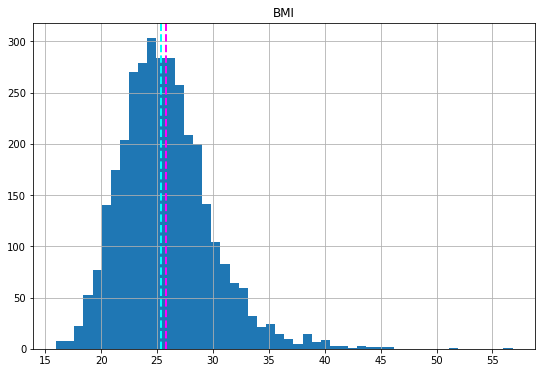

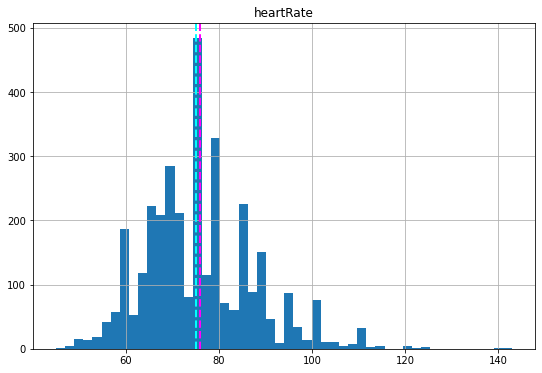

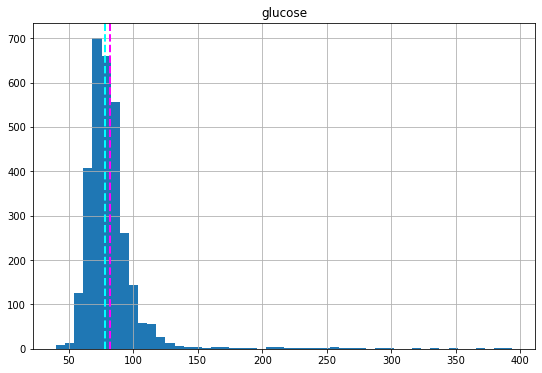

In [ ]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

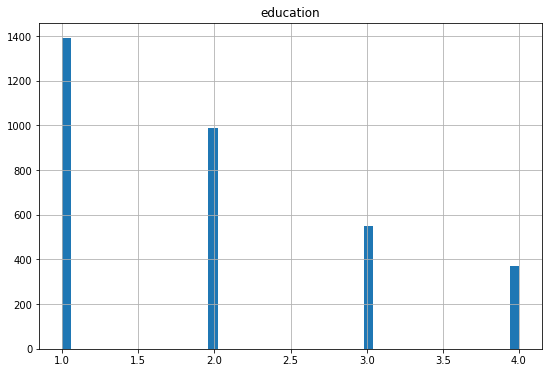

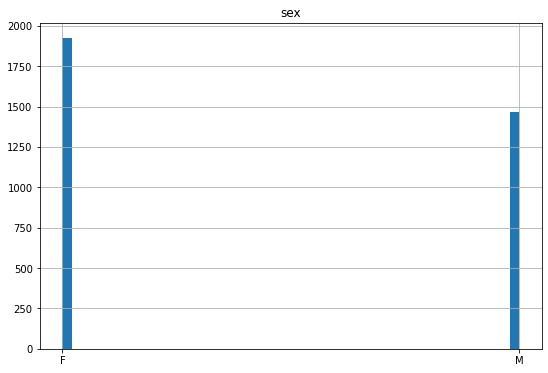

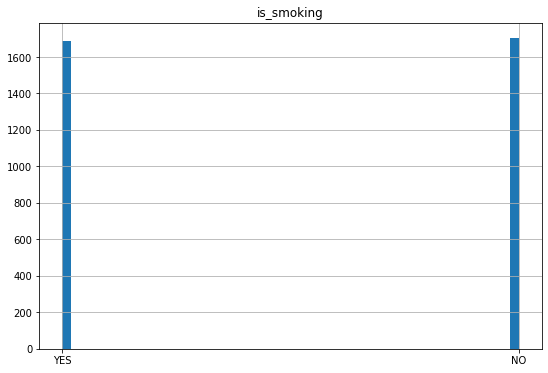

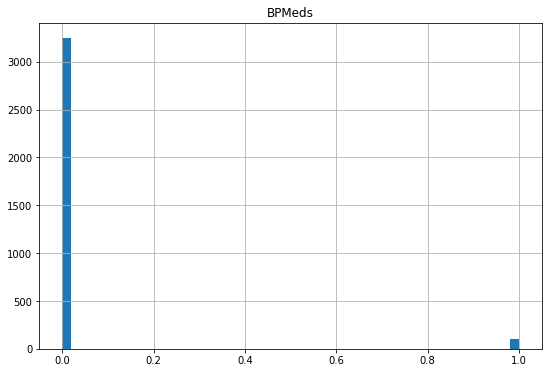

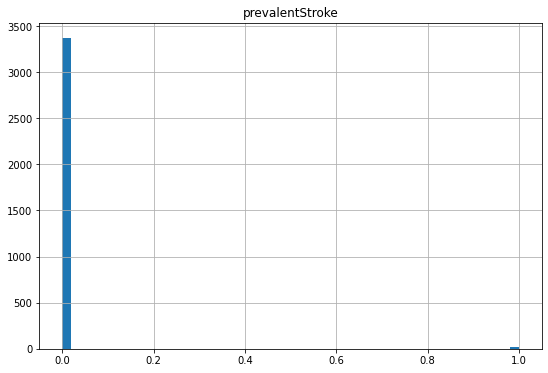

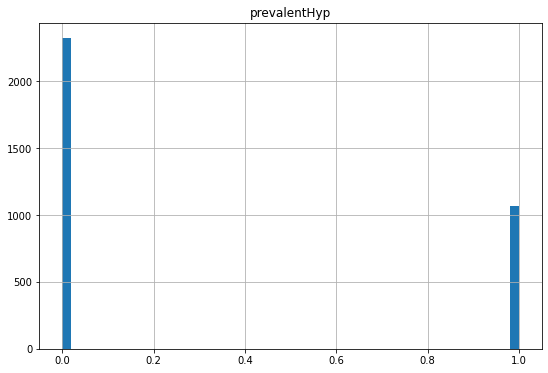

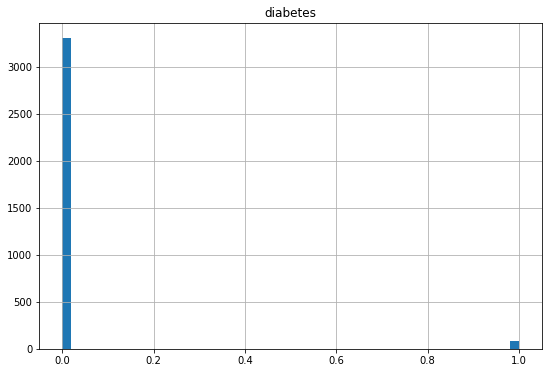

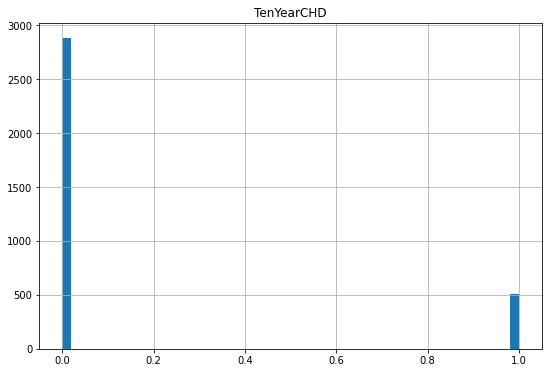

In [ ]:
# plot a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

### Inferences:
* People in our dataset are devided into four levels in education point of view and the level 1 people are large as levels increse to four the number is decreased.
* Females are more compared number of males in our dataset.
* number of smokers and non-smokers are equal.
* only few people on blood pressure medication in our dataset.
* only few people had previously had a stroke.
* patients were hypertensive more in number compered to patients were not hypertensive.
* only few people had diabates.
* In our dataset, less percentage of people were prone to cardiac arrest in coming ten years.
* we have imbalanced dataset (one of the target class labels’ numbers of observation is significantly lower than other class labels).

**If our target variable is imbalnced then it would be better to pick our metrics wisely like recall or F1 score.**

# Bivariate Analisis:

---



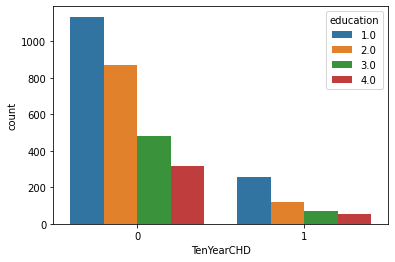

In [ ]:
# count plot of education levels people having diseases
sns.countplot(x ='TenYearCHD', hue ='education', data = df)

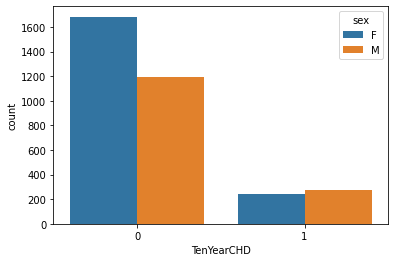

In [ ]:
# count of males and females having heart disease
# count plot on two categorical variable
sns.countplot(x ='TenYearCHD', hue = "sex", data = df)

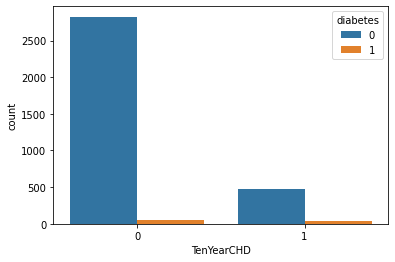

In [ ]:
# count plot of diabatic people having diseases
sns.countplot(x ='TenYearCHD', hue ='diabetes', data = df)

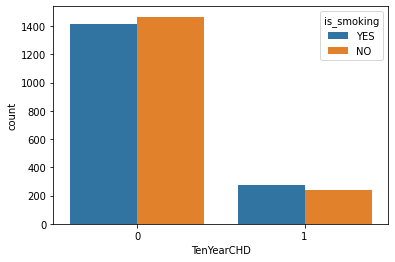

In [ ]:
# count plot of smoking people having diseases
sns.countplot(x ='TenYearCHD', hue ='is_smoking', data = df)

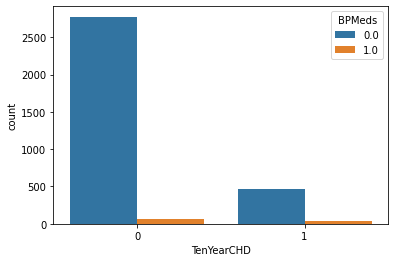

In [ ]:
# count plot of BP Medication people having diseases
sns.countplot(x ='TenYearCHD', hue ='BPMeds', data = df)

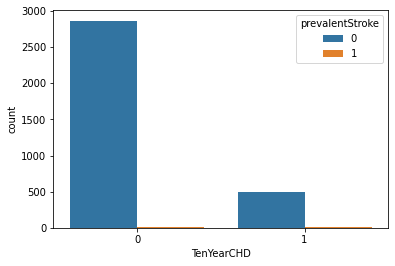

In [ ]:
# count plot of prevalent stroke people having diseases
sns.countplot(x ='TenYearCHD', hue ='prevalentStroke', data = df)

In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


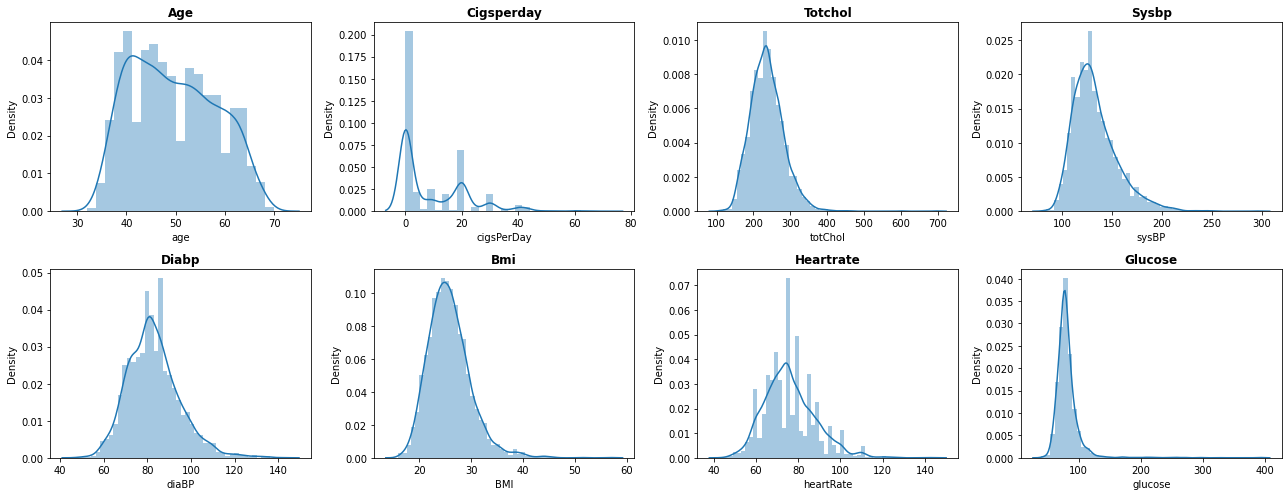

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

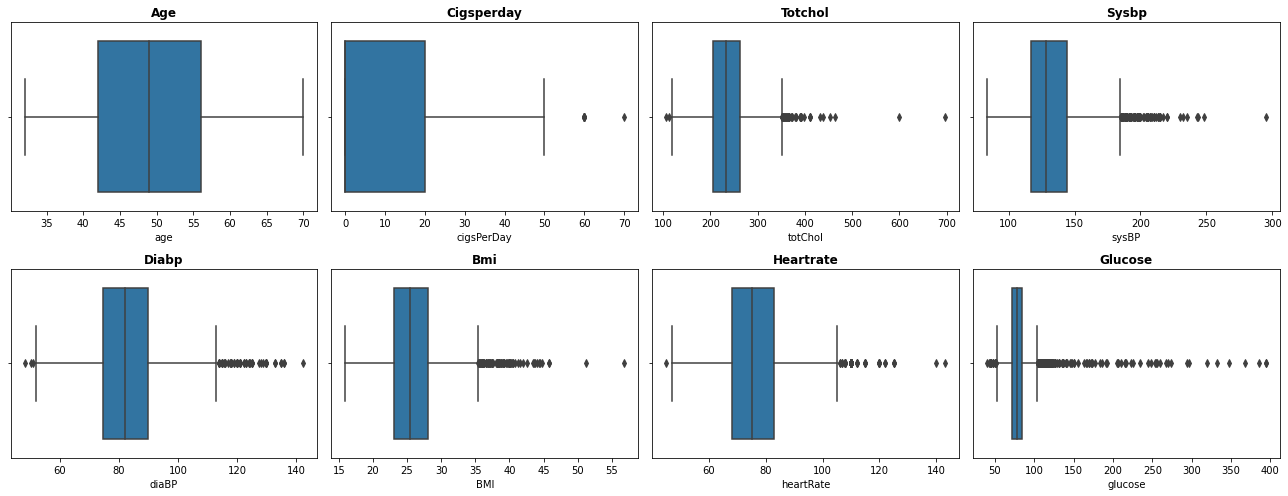

In [ ]:
# using box plot to see outliers in each numerical feature in our data
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### inferences:
* Age is ranging from 30 to 70.
* cigsperday is ranging from 0 to 70.
* total cholestral is ranging from 100 to 700.
* sysbp is ranging from 100 to 300.
* diabp is ranging from 40 to 140.
* BMI is ranging from 15 to 55.
* heart rate is ranging from 40 to 140.
* glucose level is from 40 to 400.

* we can see outliers in our dataset
* outliers in total cholestral, systolic blood pressure, diastolic blood pressure, body mass index, heartrate and glucose level.

# Outliers Removal:

---
* We should not remove outliers blindly because domain point of view those data points are meaningful to the analysis.
* If we remove all outliers without considering their importance, we may lost impoertant pieces of our study.

### List of Machine Learning algorithms which are sensitive to outliers:
* Linear Regression
* Logistic Regression
* Support Vector Machine
* K- Nearest Neighbors
* K-Means Clustering
* Hierarchical Clustering
* Principal Component Analysis

### List of Machine Learning algorithms which are not sensitive to outliers:
* Decision Tree
* Random Forest
* XGBoost
* AdaBoost
* Naive Bayes

### First, we will check performance of our models without removing ouliers. Then we will decide what to do.

In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)


In [ ]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


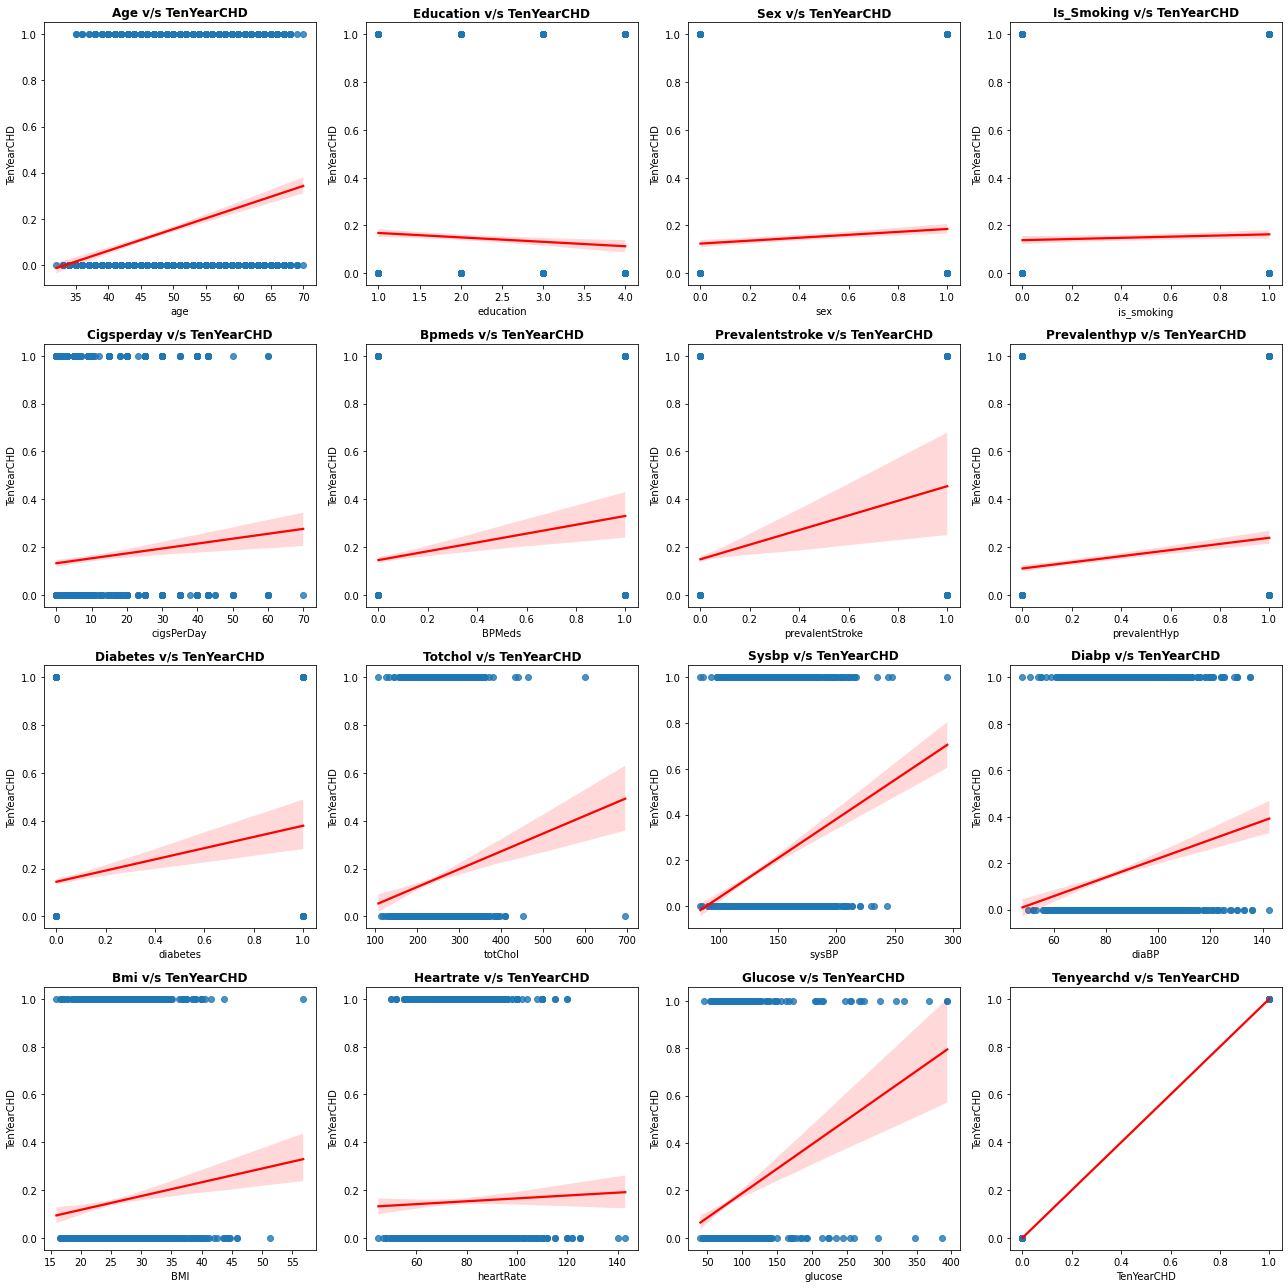

In [ ]:
# Checking relationship
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns ):
  plt.subplot(4, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

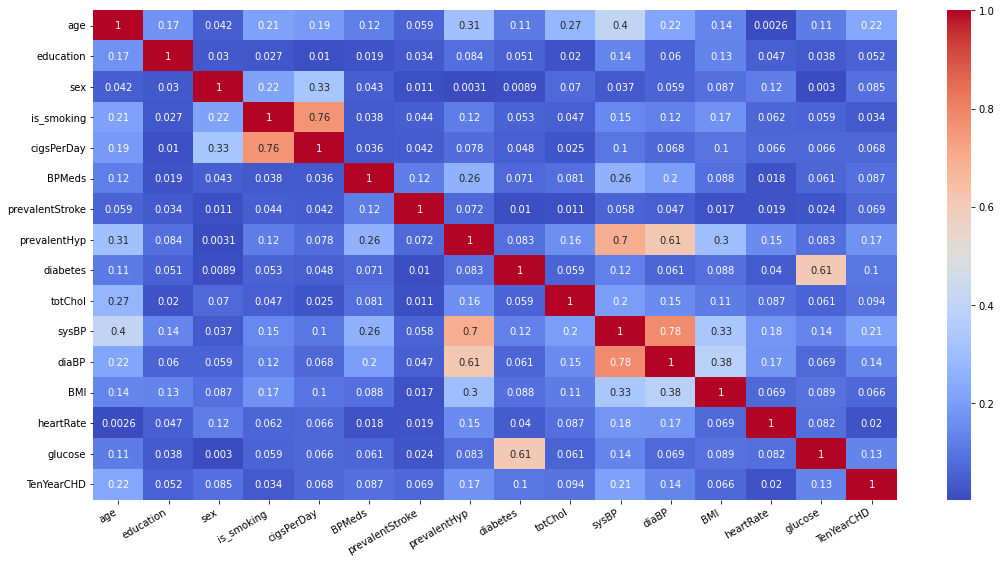

In [ ]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# Method 1: choosing proper evaluation matrics:
The accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions. This may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class.

For an imbalanced class dataset F1 score is a more appropriate metric.

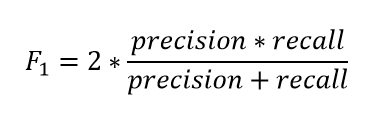

**If the classifier predicts the minority class but the prediction is erroneous and false-positive increases, the precision metric will be low and so as F1 score. Also, if the classifier identifies the minority class poorly, i.e. more of this class wrongfully predicted as the majority class then false negatives will increase, so recall and F1 score will low. F1 score only increases if both the number and quality of prediction improves. F1 score keeps the balance between precision and recall and improves the score only if the classifier identifies more of a certain class correctly.**

# Model Building:

In [ ]:
# importing requisite libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df.columns if i not in ['TenYearCHD']]
# Splitting the data into train and test
X = df[independent_variables]
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')
    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

#  Naive Bayes Classifier

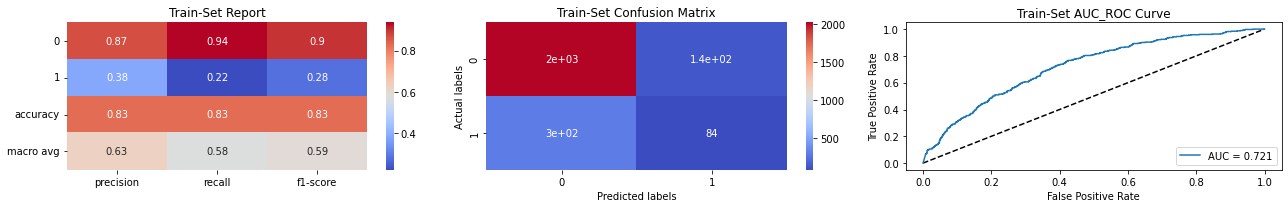

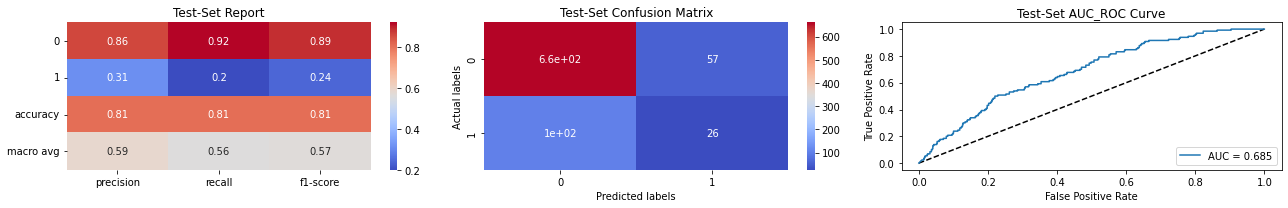

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [ ]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc,X_train_scaled, X_test_scaled, y_train, y_test)

# Random Forest Classifier

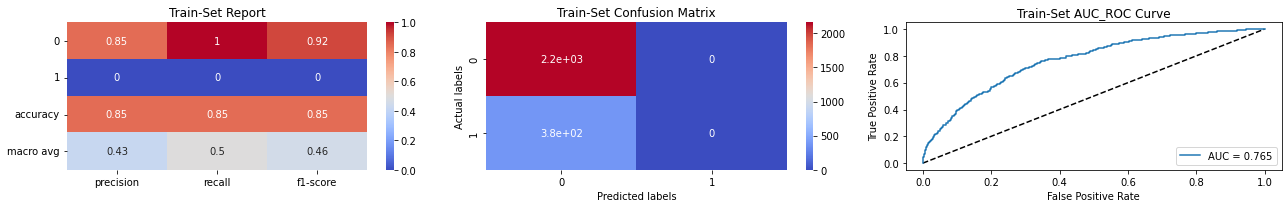

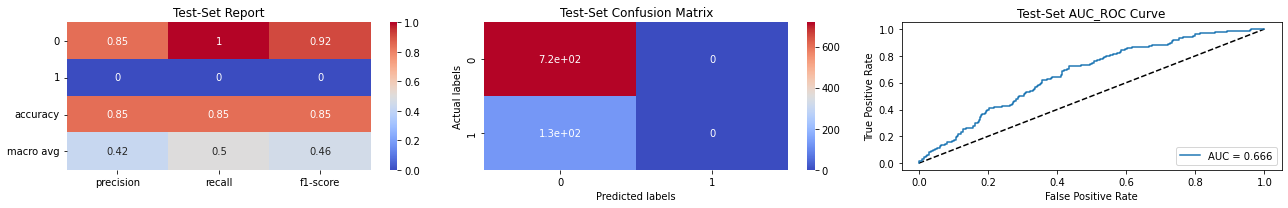

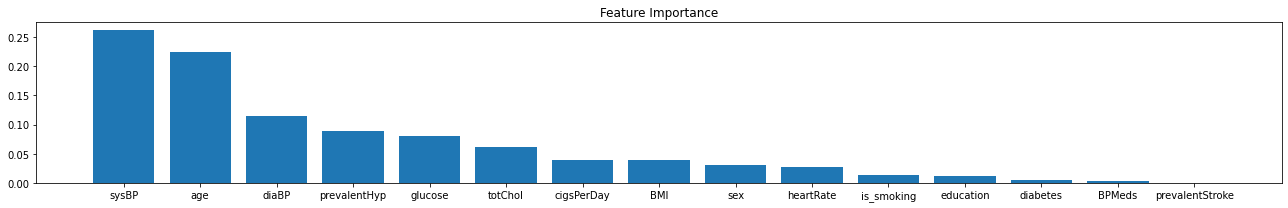

RandomForestClassifier(max_depth=4, min_samples_leaf=46, min_samples_split=50,
                       random_state=2)

In [ ]:
# random forest classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_train_scaled, y_train)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# XGBoost Classifier

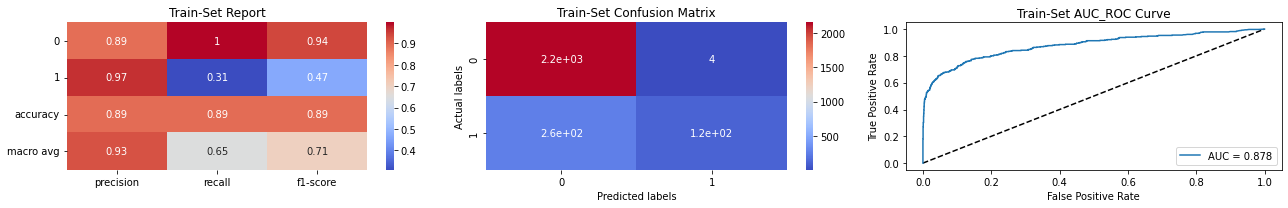

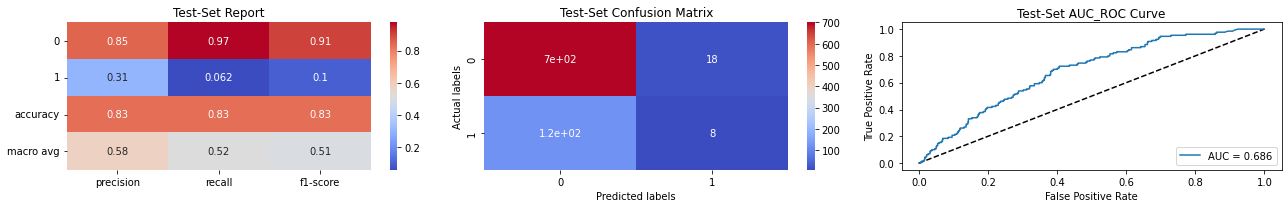

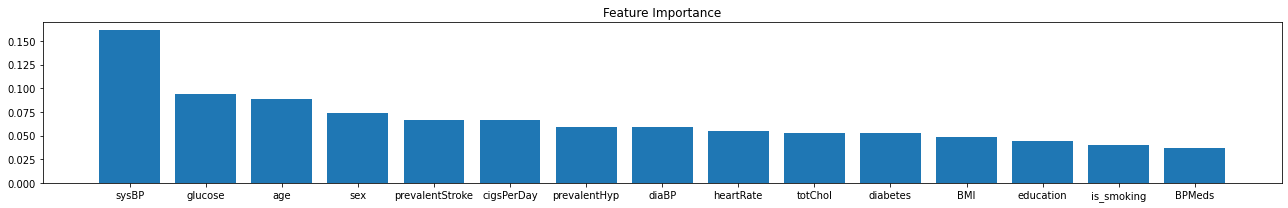

XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)

In [ ]:
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_train_scaled, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# Method 2 :Resampling (oversmapling the minority class) is another method for handling imbanced traget classes.

* By using oversampling and undersampling, we will able to get balanced data set.

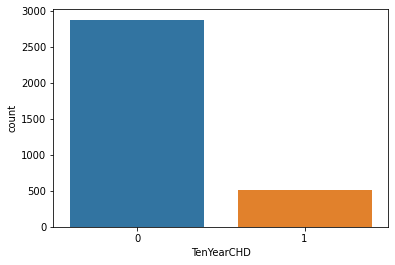

In [ ]:
# count of TenYearCHD classes
sns.countplot(df['TenYearCHD'])

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['TenYearCHD']==0)] 
df_minority = df[(df['TenYearCHD']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2879, # to match majority class
                                 random_state=40)  # reproducible result
                  
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled['TenYearCHD'].value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

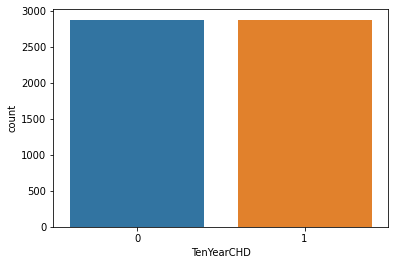

In [ ]:
sns.countplot(df_upsampled['TenYearCHD'])

* We can see that from above plot that our unbalanced target classes converted into balanced ones.

In [ ]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

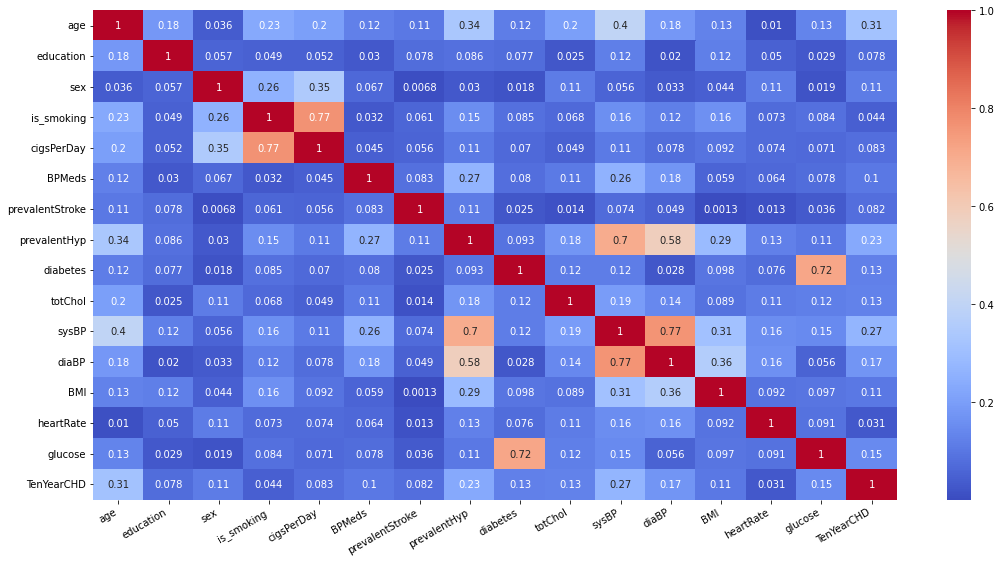

In [ ]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df_upsampled.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
df_upsampled['cigsperday']= df_upsampled['is_smoking']*df_upsampled['cigsPerDay']
df_upsampled['Bp_ratio']= df_upsampled['sysBP']/df_upsampled['diaBP']
df_upsampled.drop(['is_smoking','cigsPerDay','sysBP','diaBP'],axis=1,inplace=True)

In [ ]:
# info of modified data
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758 entries, 2187 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              5758 non-null   int64  
 1   education        5758 non-null   float64
 2   sex              5758 non-null   int64  
 3   BPMeds           5758 non-null   float64
 4   prevalentStroke  5758 non-null   int64  
 5   prevalentHyp     5758 non-null   int64  
 6   diabetes         5758 non-null   int64  
 7   totChol          5758 non-null   float64
 8   BMI              5758 non-null   float64
 9   heartRate        5758 non-null   float64
 10  glucose          5758 non-null   float64
 11  TenYearCHD       5758 non-null   int64  
 12  cigsperday       5758 non-null   float64
 13  Bp_ratio         5758 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 803.8 KB


In [ ]:
# first ten rows
df_upsampled.head(10)

,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,cigsperday,Bp_ratio
2187,66,1.0,1,0.0,0,0,1,234.0,28.62,75.0,216.0,1,30.0,1.832000
1528,44,1.0,1,0.0,0,0,0,229.0,34.39,110.0,80.0,1,0.0,1.404255
51,56,3.0,1,0.0,0,0,0,340.0,21.91,50.0,72.0,1,20.0,1.497207
1107,48,1.0,1,0.0,0,0,0,212.0,20.27,66.0,62.0,1,30.0,1.616279
3343,55,4.0,0,0.0,0,1,0,260.0,32.27,58.0,72.0,1,0.0,1.716418
2960,37,2.0,1,0.0,0,0,0,211.0,24.50,68.0,78.0,1,20.0,1.503226
2087,49,4.0,1,0.0,0,0,0,256.0,28.21,93.0,85.0,1,0.0,1.564417
1299,62,1.0,1,0.0,0,0,0,217.0,26.21,80.0,66.0,1,43.0,1.433333
1862,65,1.0,0,0.0,1,1,0,290.0,21.41,58.0,145.0,1,0.0,2.250000
2188,62,3.0,0,1.0,0,1,1,358.0,37.62,110.0,368.0,1,20.0,1.954545


In [ ]:
# last ten rows
df_upsampled.tail(10)

,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,cigsperday,Bp_ratio
3378,39,3.0,0,0.0,0,0,0,197.0,19.71,55.0,63.0,0,0.0,1.653595
3379,39,1.0,1,0.0,0,0,0,292.0,31.09,85.0,78.0,0,30.0,1.411765
3380,56,1.0,0,0.0,0,0,0,240.0,27.38,80.0,82.0,0,20.0,1.582278
3382,43,4.0,1,0.0,0,1,0,260.0,25.29,70.0,62.0,0,0.0,1.433333
3383,57,3.0,0,0.0,0,0,0,210.0,26.59,70.0,77.0,0,0.0,1.541176
3384,61,1.0,0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,0.0,2.116279
3385,60,1.0,0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,0.0,1.563291
3386,46,1.0,0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,0.0,1.821429
3388,60,1.0,1,0.0,0,1,0,191.0,23.01,80.0,85.0,0,0.0,1.590476
3389,54,3.0,0,0.0,0,0,0,288.0,29.88,79.0,92.0,0,0.0,1.610390


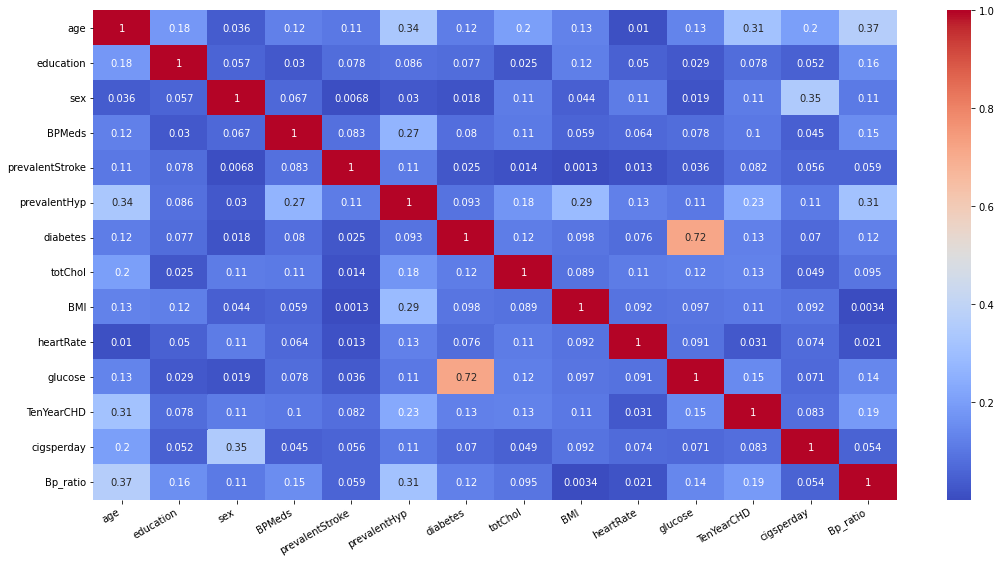

In [ ]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df_upsampled.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
# Checking VIF for each variable
independent_variables = [i for i in df_upsampled.columns if i not in ['TenYearCHD','Bp_ratio']]
calc_vif(df_upsampled[independent_variables])

,variables,VIF
0,age,33.612955
1,heartRate,33.340891
2,BMI,32.674840
3,totChol,26.846852
4,glucose,15.329189
5,education,4.510429
6,sex,2.260210
7,diabetes,2.069326
8,prevalentHyp,1.997581
9,cigsperday,1.970002


In [ ]:
X = df_upsampled[independent_variables]
y = df_upsampled['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Logistic Regression :

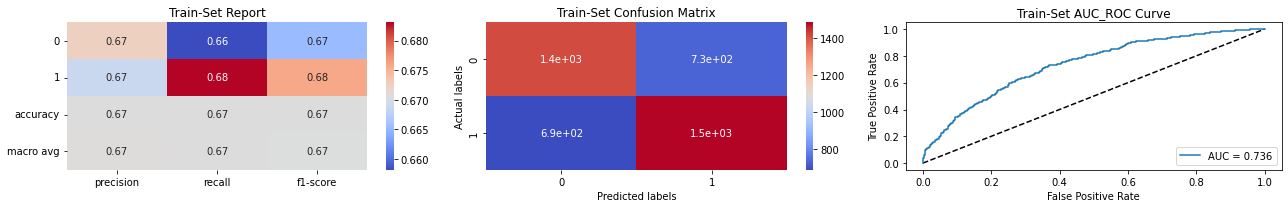

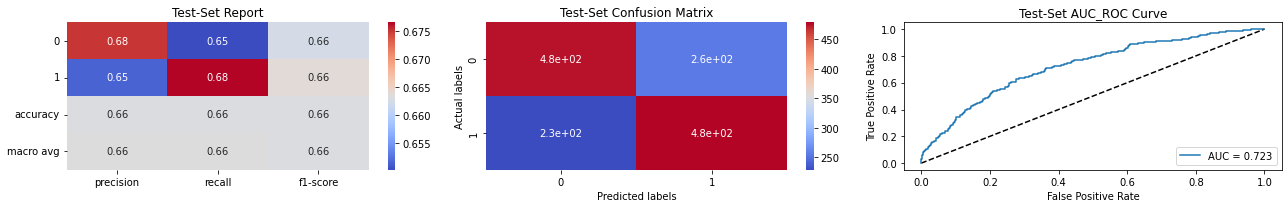

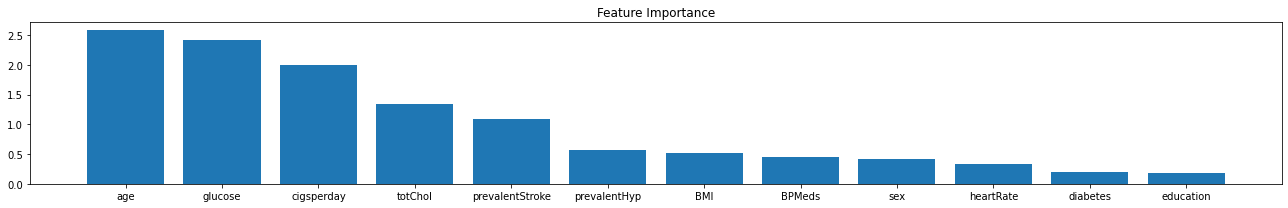

LogisticRegression(max_iter=10000)

In [ ]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)

# Naive Bayes Classifier :

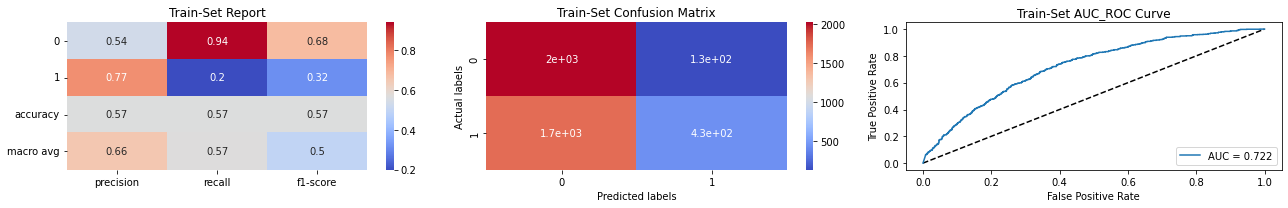

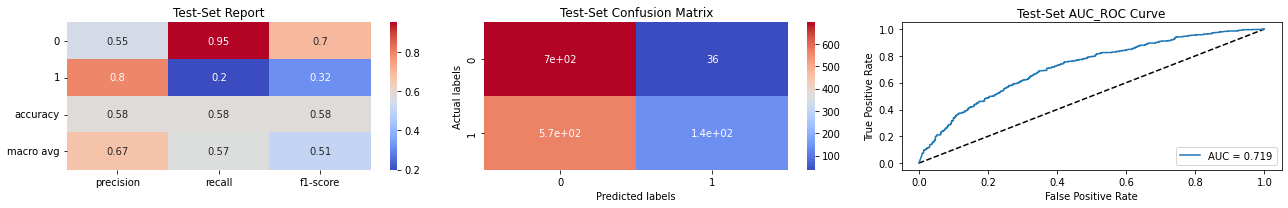

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [ ]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, X_train_scaled, X_test_scaled, y_train, y_test)

# DecisionTreeClassifier :

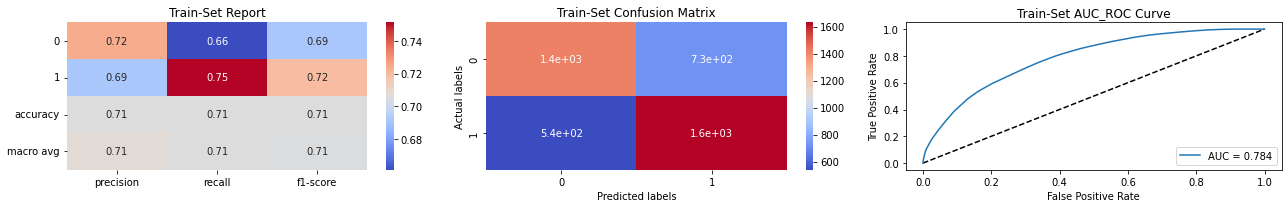

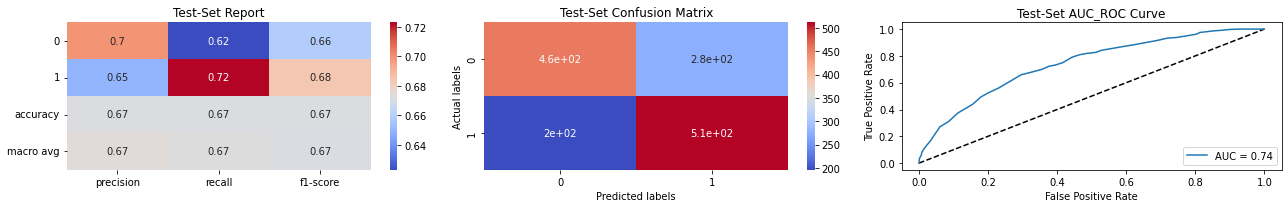

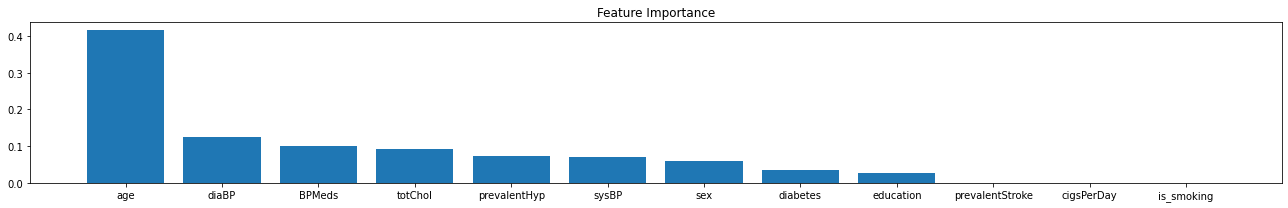

DecisionTreeClassifier(max_depth=6, min_samples_leaf=60, min_samples_split=50,
                       random_state=10)

In [ ]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)

# HYperparameter Grid
grid = {'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' :[40,60]}

# GridSearch to find the best parameters
dt = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
dt.fit(X_train_scaled, y_train)

# Analysing the model with best set of parameters
analyse_model(dt.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# KNN Classifier :

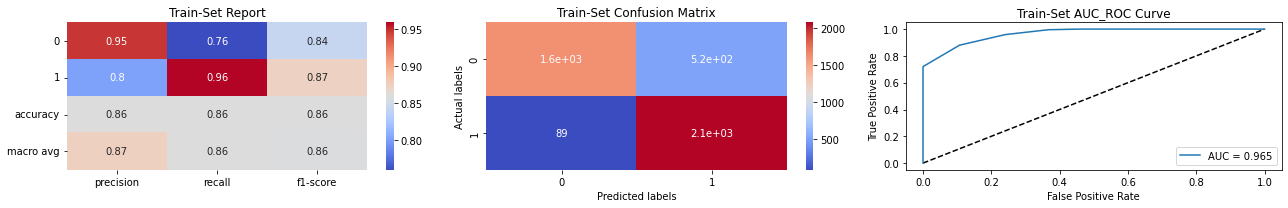

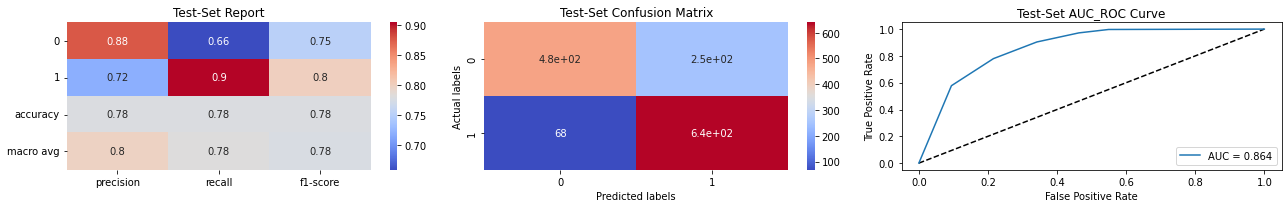

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier()

In [ ]:
#  K Nearest Neighbour Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(X_train_scaled, y_train)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# XGBoost Classifier :

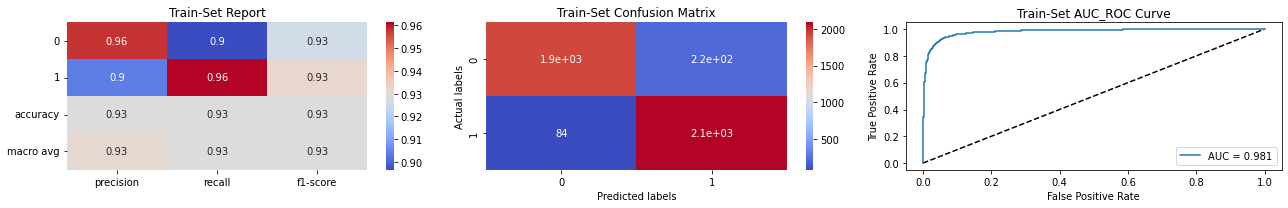

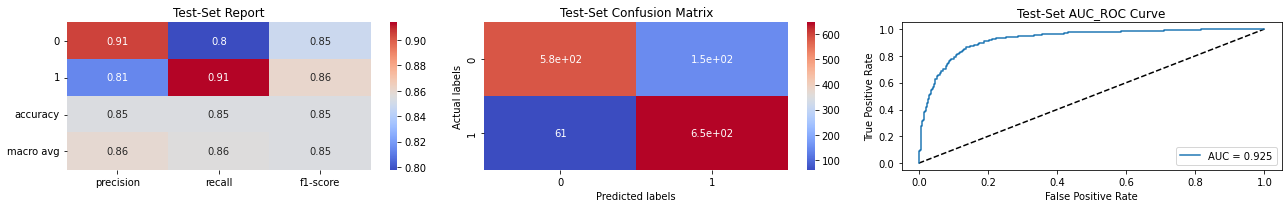

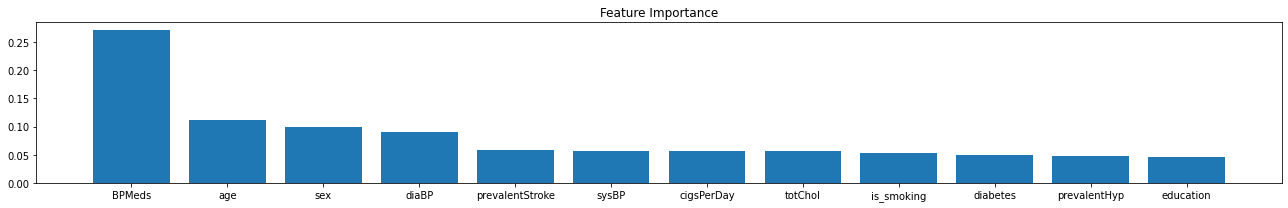

XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=11,
                silent=True)

In [ ]:
#  XG BOOST Classifier
clf = XGBRFClassifier(silent=True, random_state=11)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_train_scaled, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# Random Forest Classifier :

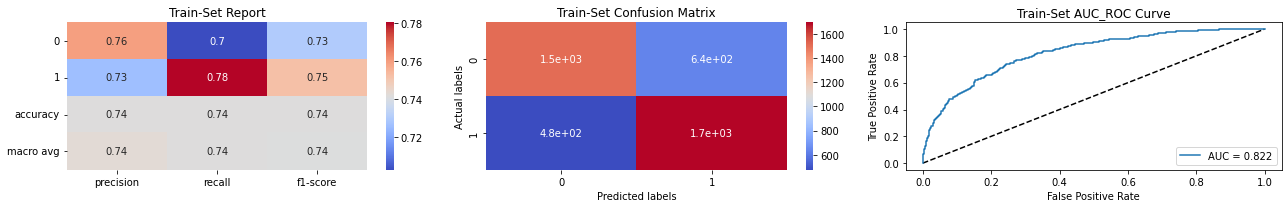

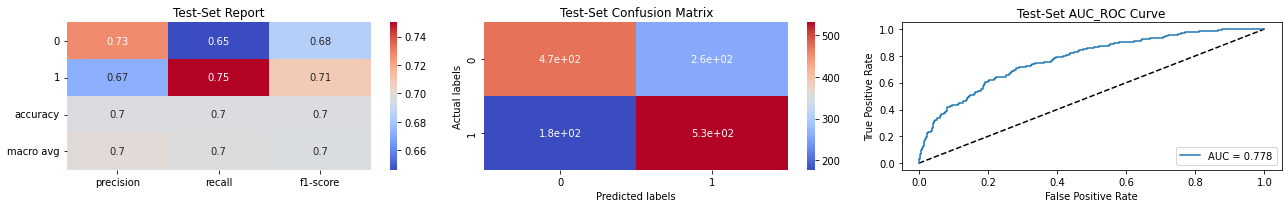

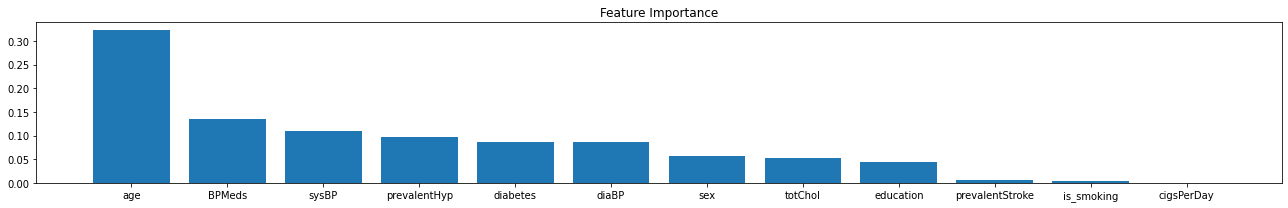

RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50,
                       n_estimators=150, random_state=12)

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=12)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_train_scaled, y_train)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)

# Conclusions:

---


1. Age is ranging from 30 to 70.
2. cigsperday is ranging from 0 to 70.
3. total cholestral is ranging from 100 to 700.
4. sysbp is ranging from 100 to 300.
5. diabp is ranging from 40 to 140.
6. BMI is ranging from 15 to 55.
7. heart rate is ranging from 40 to 140.
8. glucose level is from 40 to 400.
9. Females are more than number of males in our dataset but number of males prone to heart disease are more compared to females.
10. higher education people are less but all education level people having equal share of heart disease prone.
11. we have imbalanced dataset. So we buit machine learning algorithms in two scenarios. They are 

*   without upsample (no resample)
*   with upsample (resample)

## No Resampling on dataset:

---
### F1 Score on test dataset :

* Naive Bayes Classifier: 0.57
* Random Forest Classifier: 0.46
* XGBoost Classifier: 0.51

## Resampling dataset case:


---

### F1 score on test datsset :

* Logistic Regression: 0.66
* Naive Bayes Classifier: 0.51
* Decision Tree Classifier: 0.67
* KNN Classifier: 0.78
* XGBoost Classifier: 0.85
* Random Forest Classifier: 0.7

